# Prosper Loans Data Analysis



## Introduction

> This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status, borrower credit history, and the latest payment information.

The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.shape

(113937, 81)

In [28]:
def group_loan_status(data):
    if '(' in data:
        return 'Past Due'
    elif data == 'FinalPaymentInProgress':
        return 'Completed'
    else:
        return data
    
df['LoanStatusGroup'] = df.LoanStatus.apply(group_loan_status)

In [32]:
df = df[df.LoanStatusGroup != 'Cancelled']

In [35]:
df['CreditScoreAverage'] = (df.CreditScoreRangeLower + df.CreditScoreRangeUpper) / 2

## Univariate Exploration

Let's look at the distribution of Debt to income ratio

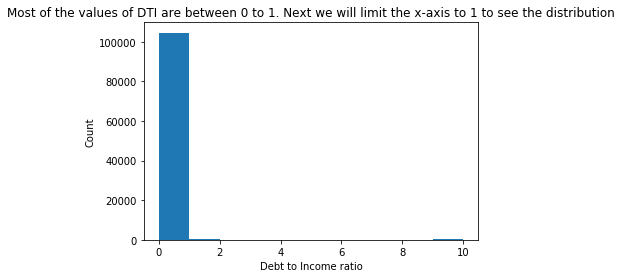

In [7]:
plt.hist(df.DebtToIncomeRatio)
plt.ylabel('Count')
plt.xlabel('Debt to Income ratio')
plt.title('Most of the values of DTI are between 0 to 1. Next we will limit the x-axis to 1 to see the distribution');

since most of the values are between 0 an 1 limit the x-axis

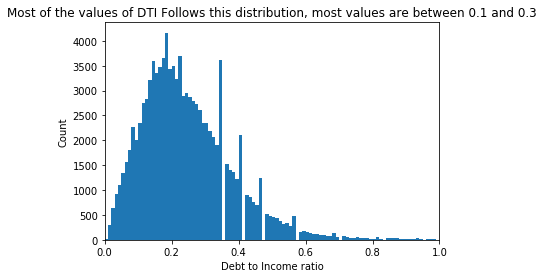

In [21]:
bin_edges = np.arange(0,1,0.01)
plt.hist(df.DebtToIncomeRatio,bins = bin_edges)
plt.xlim((0,1))
plt.ylabel('Count')
plt.xlabel('Debt to Income ratio')
plt.title('Most of the values of DTI Follows this distribution, most values are between 0.1 and 0.3');

In [11]:
base_color = sns.color_palette()[0]

In [24]:
df.IncomeRange.value_counts()/df.shape[0]

$25,000-49,999    0.282542
$50,000-74,999    0.272519
$100,000+         0.152163
$75,000-99,999    0.148468
Not displayed     0.067941
$1-24,999         0.063842
Not employed      0.007074
$0                0.005450
Name: IncomeRange, dtype: float64

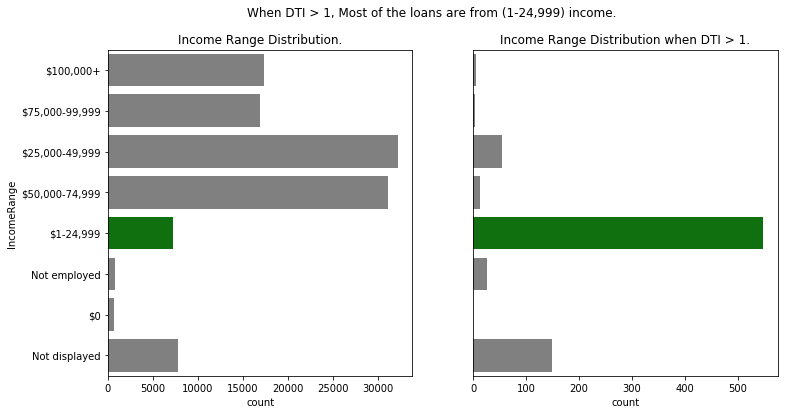

In [26]:
order = ['$100,000+', '$75,000-99,999','$25,000-49,999', '$50,000-74,999',
         '$1-24,999', 'Not employed', '$0','Not displayed']
palette = ['grey','grey','grey','grey','green','grey','grey','grey']
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.countplot(y = df.IncomeRange, palette = palette,order = order)
plt.title('Income Range Distribution.')

plt.subplot(1,2,2)
sns.countplot(y = df[df.DebtToIncomeRatio > 1]['IncomeRange'],palette = palette , order = order)
plt.ylabel('')
plt.yticks([])
plt.title('Income Range Distribution when DTI > 1.')
plt.suptitle('When DTI > 1, Most of the loans are from (1-24,999) income.');

TODO - set an order and make percentages for both plots in a same scale

(25,000 to 50,000 and 50,000 to 75,000) has almost same number of loans but do their loan stauts distribution will be same? We can also look at how DebtToIncomeRatio is in the income range buckets for each loan status

Most of the DTI values with more than 1 are from (1-24,999) category so if we include these we will be biasing our results. because less than 10% of (1-24,999) category has DTI greater than 1 but these can change the average values drastically.  

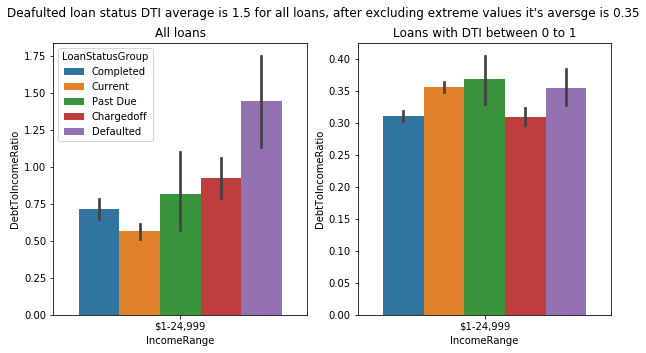

In [56]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
data = df[df.IncomeRange.isin(['$1-24,999'])]
sns.barplot(data = data, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatusGroup')
plt.title('All loans')

plt.subplot(1,2,2)
data = df[(df.DebtToIncomeRatio <= 1) & (df.IncomeRange.isin(['$1-24,999']))]
g = sns.barplot(data = data, x = 'IncomeRange', y = 'DebtToIncomeRatio', hue = 'LoanStatusGroup')
g.legend_.remove()
plt.title('Loans with DTI between 0 to 1')
plt.suptitle("Deafulted loan status DTI average is 1.5 for all loans, after excluding extreme values it's aversge is 0.35");

In ($1-24,999) income category if we consider all the loans then if the DTI average is greater than 0.75 then most probably it is one of the (chargedoff,defaulted,pastdue) loans and less than 0.75 it's either current or completed loans this conclusion is false because these average values are affected by the extreme values. if we remove the extreme cases about more than 90 percent of loans follows the different distribution and their average DTI for defaulted and charged off loans are less.

what is the Distribution of IsBorrowerHomeowner ?

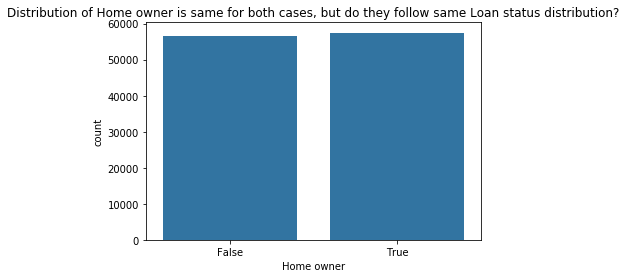

In [41]:
sns.countplot(x = df.IsBorrowerHomeowner, color = sns.color_palette()[0])
plt.xlabel('Home owner')
plt.title('Distribution of Home owner is same for both cases, but do they follow same Loan status distribution?');

we can look at the loan status distribution for both these cases and see is there any difference?

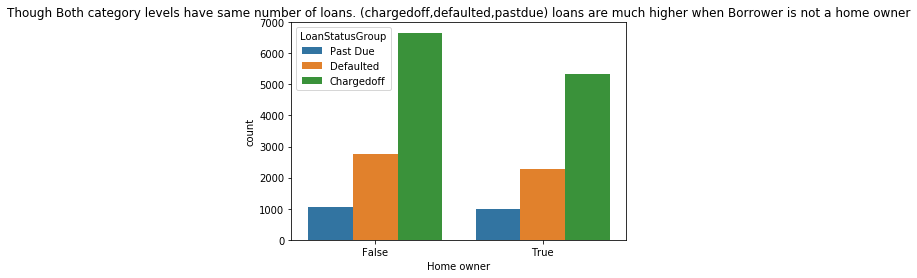

In [33]:
sns.countplot(data = df[(df.LoanStatusGroup != 'Completed') & (df.LoanStatusGroup != 'Current')],x = 'IsBorrowerHomeowner',hue = 'LoanStatusGroup')
plt.xlabel('Home owner')
plt.title('Though Both category levels have same number of loans. (chargedoff,defaulted,pastdue) loans are much higher when Borrower is not a home owner');

Though Both category levels have same number of loans. (chargedoff,defaulted,pastdue) loans are much higher when IsBorrowerHomeowner is False.

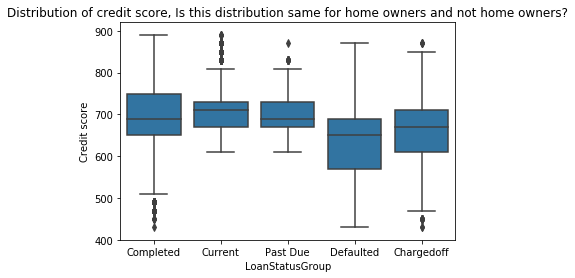

In [38]:
sns.boxplot(x = df.LoanStatusGroup, y = df.CreditScoreAverage, color = base_color)
plt.ylim(400,920)
plt.ylabel('Credit score')
plt.title('Distribution of credit score, Is this distribution same for home owners and not home owners?');

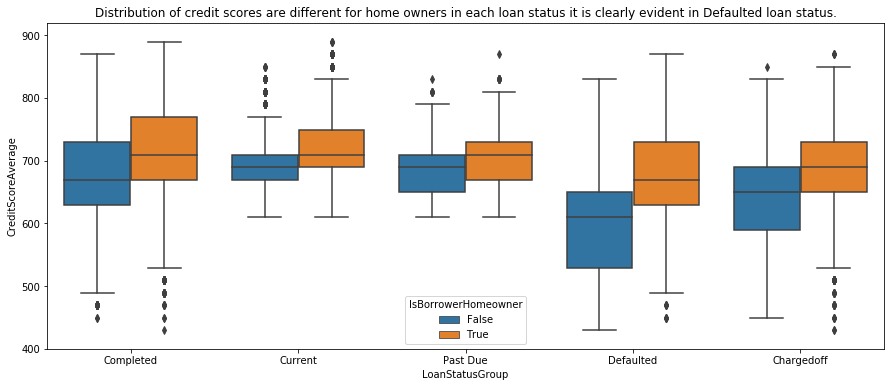

In [40]:
g = sns.boxplot(data=df, x='LoanStatusGroup', y='CreditScoreAverage', hue='IsBorrowerHomeowner');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)
plt.ylim(400,920)
plt.title('Distribution of credit scores are different for home owners in each loan status it is clearly evident in Defaulted loan status.');

In [45]:
#create a new variable to check whether he is existing borrower or new
df['borrower'] = df.TotalProsperLoans.apply(lambda x : 'existing' if x >= 1 else 'new')

In [50]:
def bar_plot(data,x,hue,order):
    plt.figure(figsize = (10,8))
    groupby = (data.groupby([x,hue])['LoanStatus'].count() / data.groupby([hue])['LoanStatus'].count()).reset_index()
    chart = sns.barplot(x=x, hue=hue, y='LoanStatus', data=groupby,order = order) #for horizontal bar plot x, y is reversed
    #chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
    chart.set(ylabel='Proportion')
    plt.title('Proportion of charged off and defaulted loans from the total existing customers are less when compared to percentage of charged off and defaulted loans from the total new customers. ')
    plt.show()

How Prosper is performing in making decisions from existing user's loan history? Do existing customers have better distribution of loan status than the new customers?

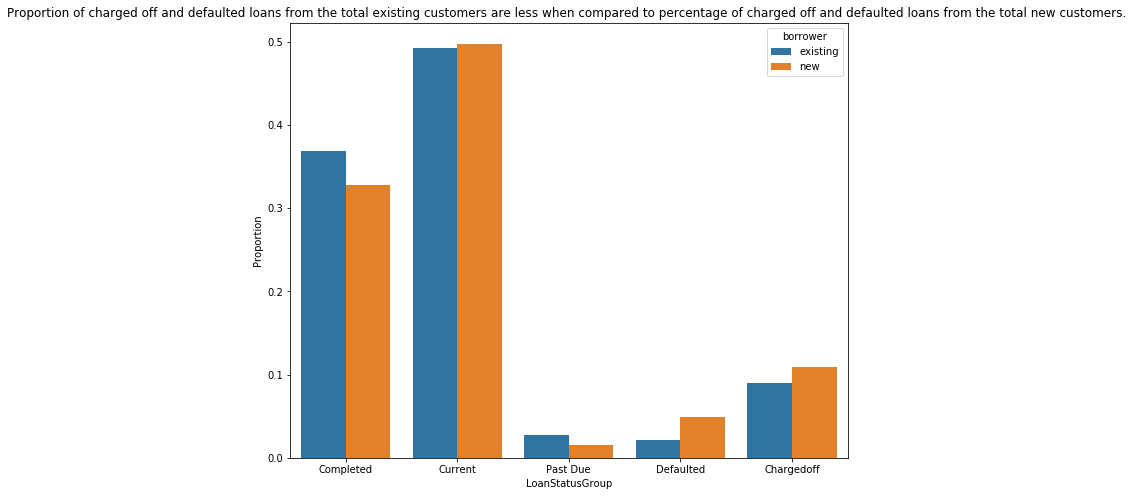

In [52]:
order = ['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff']
bar_plot(data = df, x = 'LoanStatusGroup', hue = 'borrower',order = order)

percentage of charged off and defaulted loans from the total existing customers are less when compared to percentage of charged off and defaulted loans from the total new customers. Which suggests to predict loan status borrower prosper history is more important than the general history of borrower.